In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
df= sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
# pivot_table using survived and sex
df.pivot_table(values='survived', index='sex')



,survived
sex,
female,0.742038
male,0.188908


In [ ]:
#  pivot_table using age and sex
df.pivot_table(values='age', index='sex', aggfunc='mean', margins=True)

,age
sex,
female,27.915709
male,30.726645
All,29.699118


In [ ]:
df.pivot_table(values='age', index='sex', aggfunc='sum', margins=True)

,age
sex,
female,7286.00
male,13919.17
All,21205.17


In [ ]:
# Basic pivot table: Survival rate by class and gender
pivot_table = pd.pivot_table(
    df,
    values='survived',
    index='pclass',
    columns='sex',
    aggfunc='mean'
)

print("Survival rate by class and gender:")
print(pivot_table)

# Add more pivot tables as needed
# Example: Average age of survivors based on class and gender
pivot_age = pd.pivot_table(
    df,
    values='age',
    index='pclass',
    columns='sex',
    aggfunc='mean'
)

print("\nAverage age of passengers by class and gender:")
print(pivot_age)

Survival rate by class and gender:
sex       female      male
pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447

Average age of passengers by class and gender:
sex        female       male
pclass                      
1       34.611765  41.281386
2       28.722973  30.740707
3       21.750000  26.507589


<Figure size 800x600 with 0 Axes>

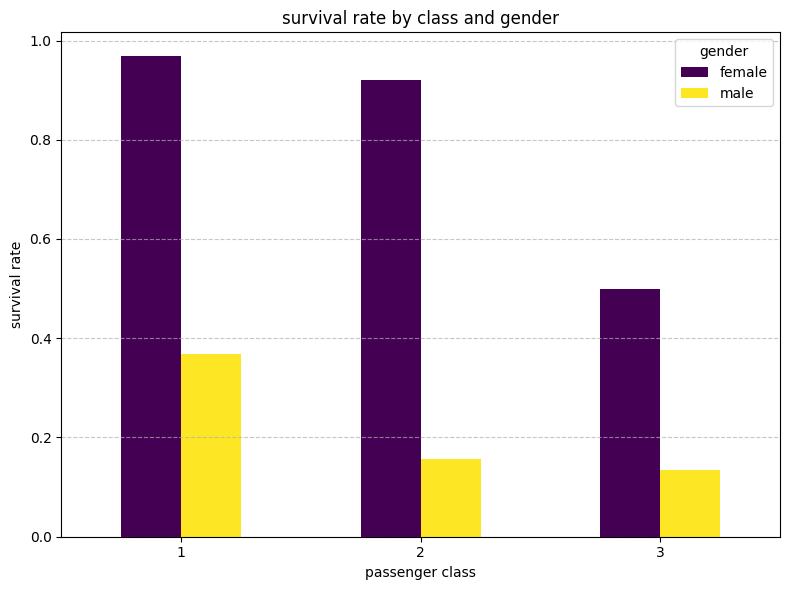

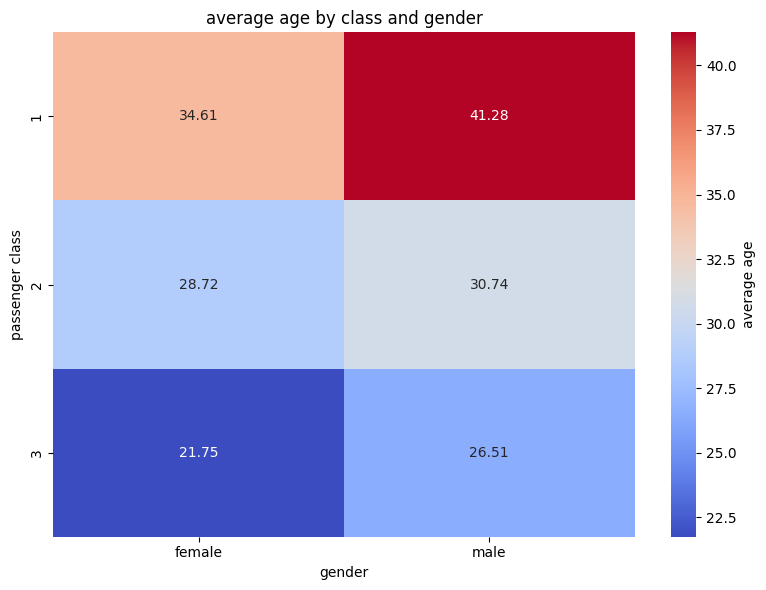

In [ ]:
# visualize survival rate by class and gender
import matplotlib.pyplot as plt

# pivot table for survival rate by class and gender
plt.figure(figsize=(8, 6))
pivot_table.plot(kind='bar', figsize=(8, 6), colormap='viridis')
plt.title('survival rate by class and gender')
plt.xlabel('passenger class')
plt.ylabel('survival rate')
plt.xticks(rotation=0)
plt.legend(title='gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# pivot table for average age by class and gender
pivot_age = pd.pivot_table(
    df,
    values='age',
    index='pclass',
    columns='sex',
    aggfunc='mean'
)

# heatmap for average age
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_age, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'average age'})
plt.title('average age by class and gender')
plt.xlabel('gender')
plt.ylabel('passenger class')
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

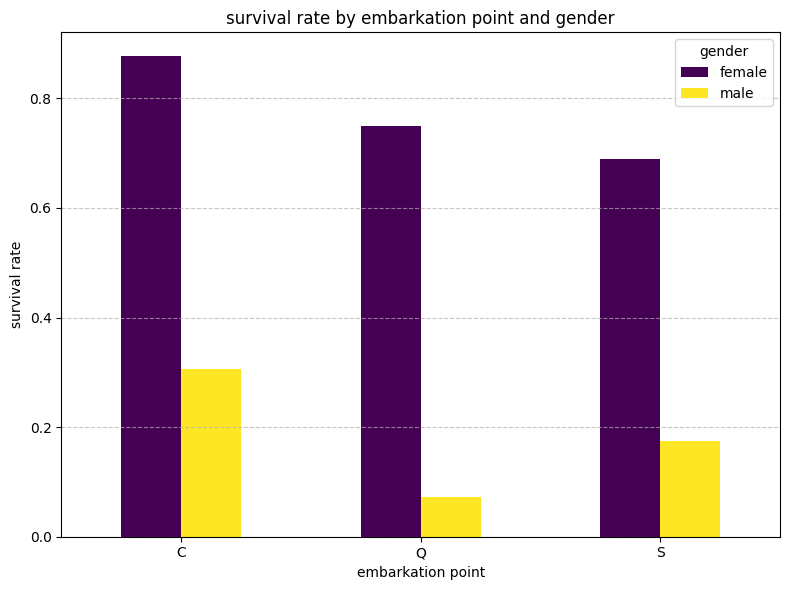

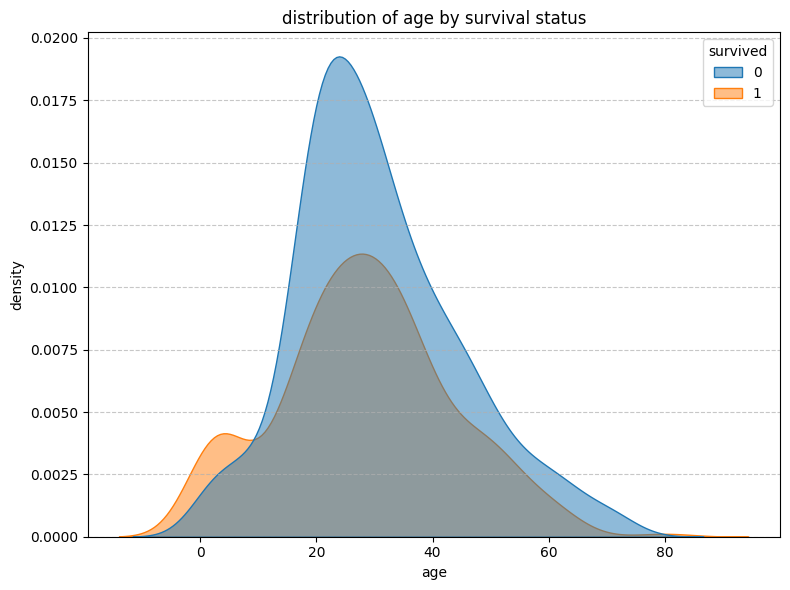

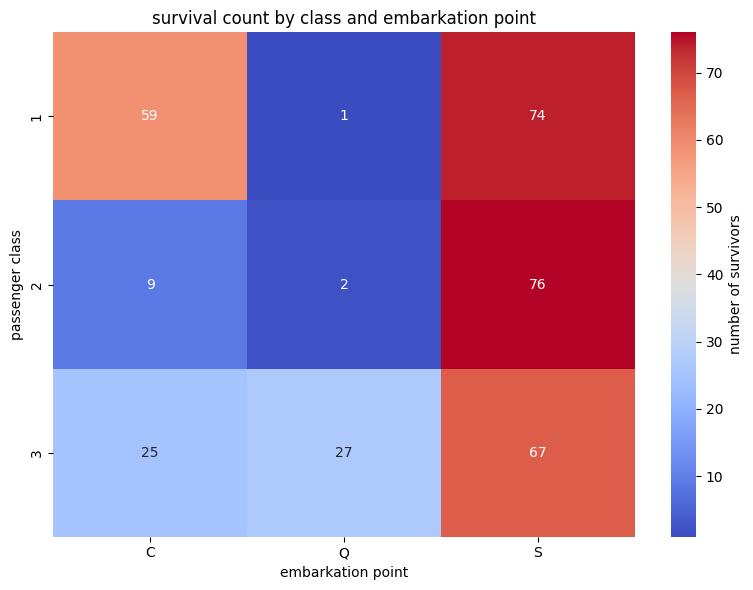

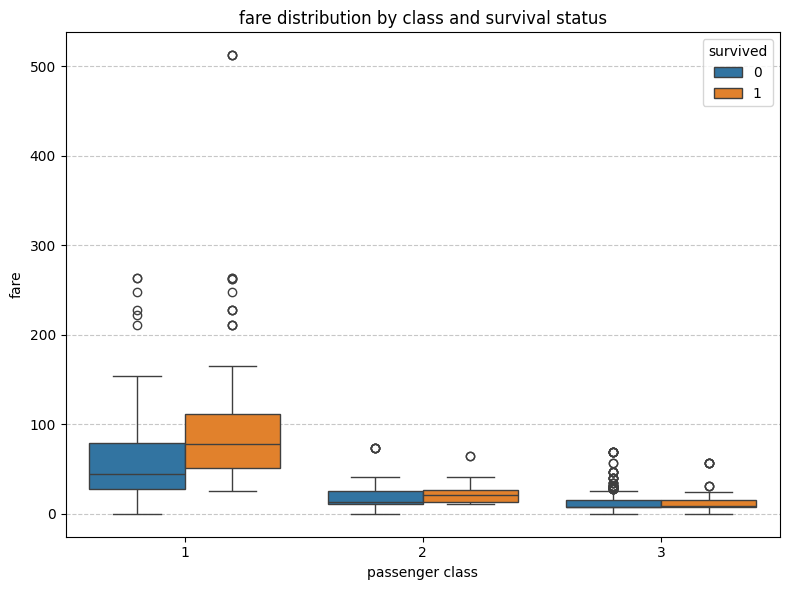

In [ ]:
# survival rate by embarkation point and gender
pivot_embarked = pd.pivot_table(
    df,
    values='survived',
    index='embarked',
    columns='sex',
    aggfunc='mean'
)

# visualize survival rate by embarkation point and gender
plt.figure(figsize=(8, 6))
pivot_embarked.plot(kind='bar', figsize=(8, 6), colormap='viridis')
plt.title('survival rate by embarkation point and gender')
plt.xlabel('embarkation point')
plt.ylabel('survival rate')
plt.xticks(rotation=0)
plt.legend(title='gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# distribution of age by survival status
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='age', hue='survived', fill=True, alpha=0.5)
plt.title('distribution of age by survival status')
plt.xlabel('age')
plt.ylabel('density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# survival count by class and embarkation point
survival_count = pd.crosstab(df['pclass'], df['embarked'], values=df['survived'], aggfunc='sum')

# heatmap for survival count
plt.figure(figsize=(8, 6))
sns.heatmap(survival_count, annot=True, cmap='coolwarm', fmt=".0f", cbar_kws={'label': 'number of survivors'})
plt.title('survival count by class and embarkation point')
plt.xlabel('embarkation point')
plt.ylabel('passenger class')
plt.tight_layout()
plt.show()

# fare distribution by class and survival status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='pclass', y='fare', hue='survived')
plt.title('fare distribution by class and survival status')
plt.xlabel('passenger class')
plt.ylabel('fare')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

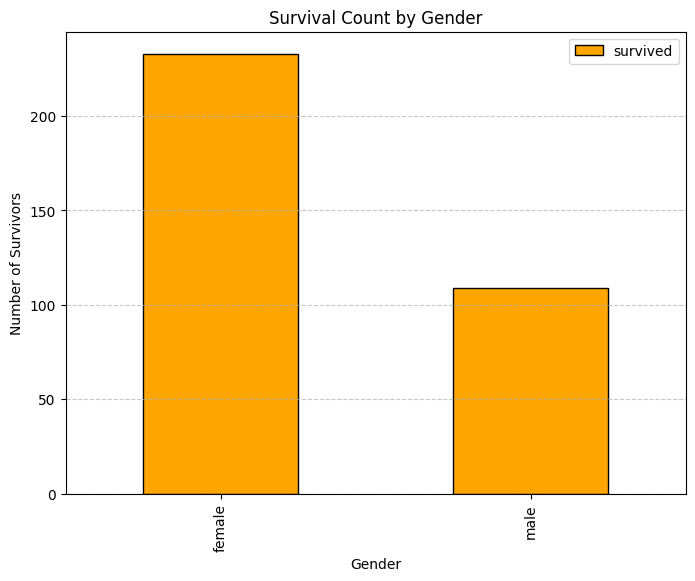

In [ ]:
pivot_bar2 = df.pivot_table(values="survived", index="sex", aggfunc="sum")
pivot_bar2.plot(kind="bar", color=["orange", "green"], edgecolor="black", figsize=(8, 6))
plt.title("Survival Count by Gender")
plt.ylabel("Number of Survivors")
plt.xlabel("Gender")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()